In [81]:
#importing packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
#importing data sets
df_train = pd.read_csv('train.csv')

In [83]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [84]:
#import to start with looking at out target variable: "SalePrice"

In [85]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

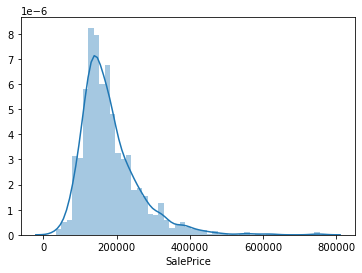

In [86]:
sns.distplot(df_train['SalePrice']);

Findings from histogram:
1. Deviate from Normal Distribution
2. Slight positive skewness .skew()
3. Showed peakedness .kurt()

In [87]:
#Calculate skew and kurtosis
print("Skewness: %f" %df_train['SalePrice'].skew())
print("Kurtosis: %f" %df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


Looking at missing values

In [88]:
missing = df_train.isnull().sum().sort_values(ascending = False)
print(missing.head(19))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64


These are the variables with many missing values
1. PoolQC has 1453 missing values
    -in the describtion, NA means that the house has no pool. hencce, we will change all NA to "NP"

In [90]:
#1st transformation: Changing NaN values to "NP" in PoolQC
df_train['PoolQC'] = df_train['PoolQC'].fillna("NP")
#Same thing for MiscFeature:
df_train['MiscFeature'] = df_train['MiscFeature'].fillna("None")
#Same thing for Alley:
df_train['Alley'] = df_train['Alley'].fillna("NoAccess")
#Same thing for Fence:
df_train['Fence'] = df_train['Fence'].fillna("NoFence")
#Same thing for FireplaceQu:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna("NoFP")
#For all Garage:
all_var = df_train.columns
garage_var = []
for i in range(len(all_var)):
    if 'Garage' in all_var[i]:
        garage_var.append(all_var[i])
del garage_var[garage_var.index('GarageCars')]
del garage_var[garage_var.index('GarageArea')]
for i in range(len(garage_var)):
    df_train[garage_var[i]] = df_train[garage_var[i]].fillna("NoGarage")
    
#Same for Basement:
bsmt_var = ['BsmtQual','BsmtExposure','BsmtFinType2','BsmtCond','BsmtFinType1']
for i in range(len(bsmt_var)):
    df_train[bsmt_var[i]] = df_train[bsmt_var[i]].fillna("NoBsmt")
missing = df_train.isnull().sum().sort_values(ascending = False)

#for MasVnr:
df_train['MasVnrType'] = df_train['MasVnrType'].fillna("None")
df_train['MasVnrArea'] = df_train['MasVnrArea'].fillna(0)

#for LotFrontage:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)


Electrical     1
SalePrice      0
Foundation     0
RoofMatl       0
Exterior1st    0
dtype: int64


In [108]:
#for Electrical, sincce there is only 1 missing value, we will just drop that row:
df_train = df_train.dropna()
#check for remaining missing values
df_train.isnull().sum().max()

0

feature selection: Correlation Matrix

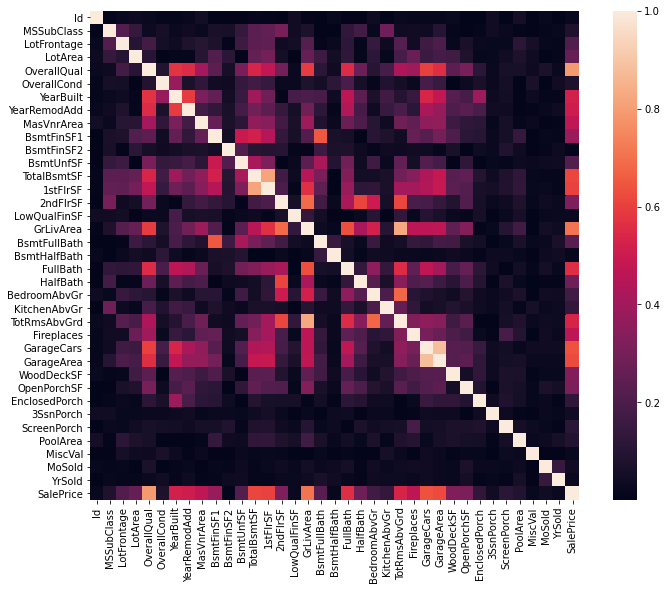

In [109]:
corrmat = df_train.corr()
corrmat_abs = corrmat.abs()
f,ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat_abs,square = True);

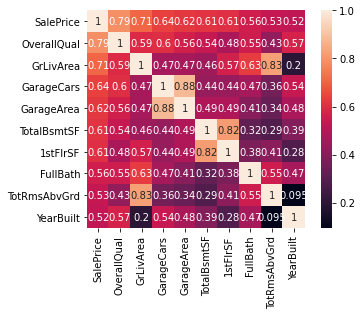

In [121]:
#filter the correlation matrix to show top 10 correlated variables against SalePrice
top_var = corrmat_abs.nlargest(10,'SalePrice').index
top_corrmat = corrmat_abs[top_var].nlargest(10,'SalePrice')
sns.heatmap(top_corrmat,cbar = True, annot = True,square = True);

In [122]:
"""
there are a few pairs that have high correlation with each other and similar correlation with SalePrice:
GarageCars and GarageArea have high correrlation, 0.88 hence we will drop GarageArea since GarageCars have a slightly higher corr with SalePrice
Same goes for TotalBsmtSF and 1stFlrSF
Same for GrLivArea and TotRmsAbvGrd
"""
top_var = list(top_var)
del top_var[top_var.index('GarageArea')]
del top_var[top_var.index('1stFlrSF')]
del top_var[top_var.index('TotRmsAbvGrd')]
print(top_var)

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']


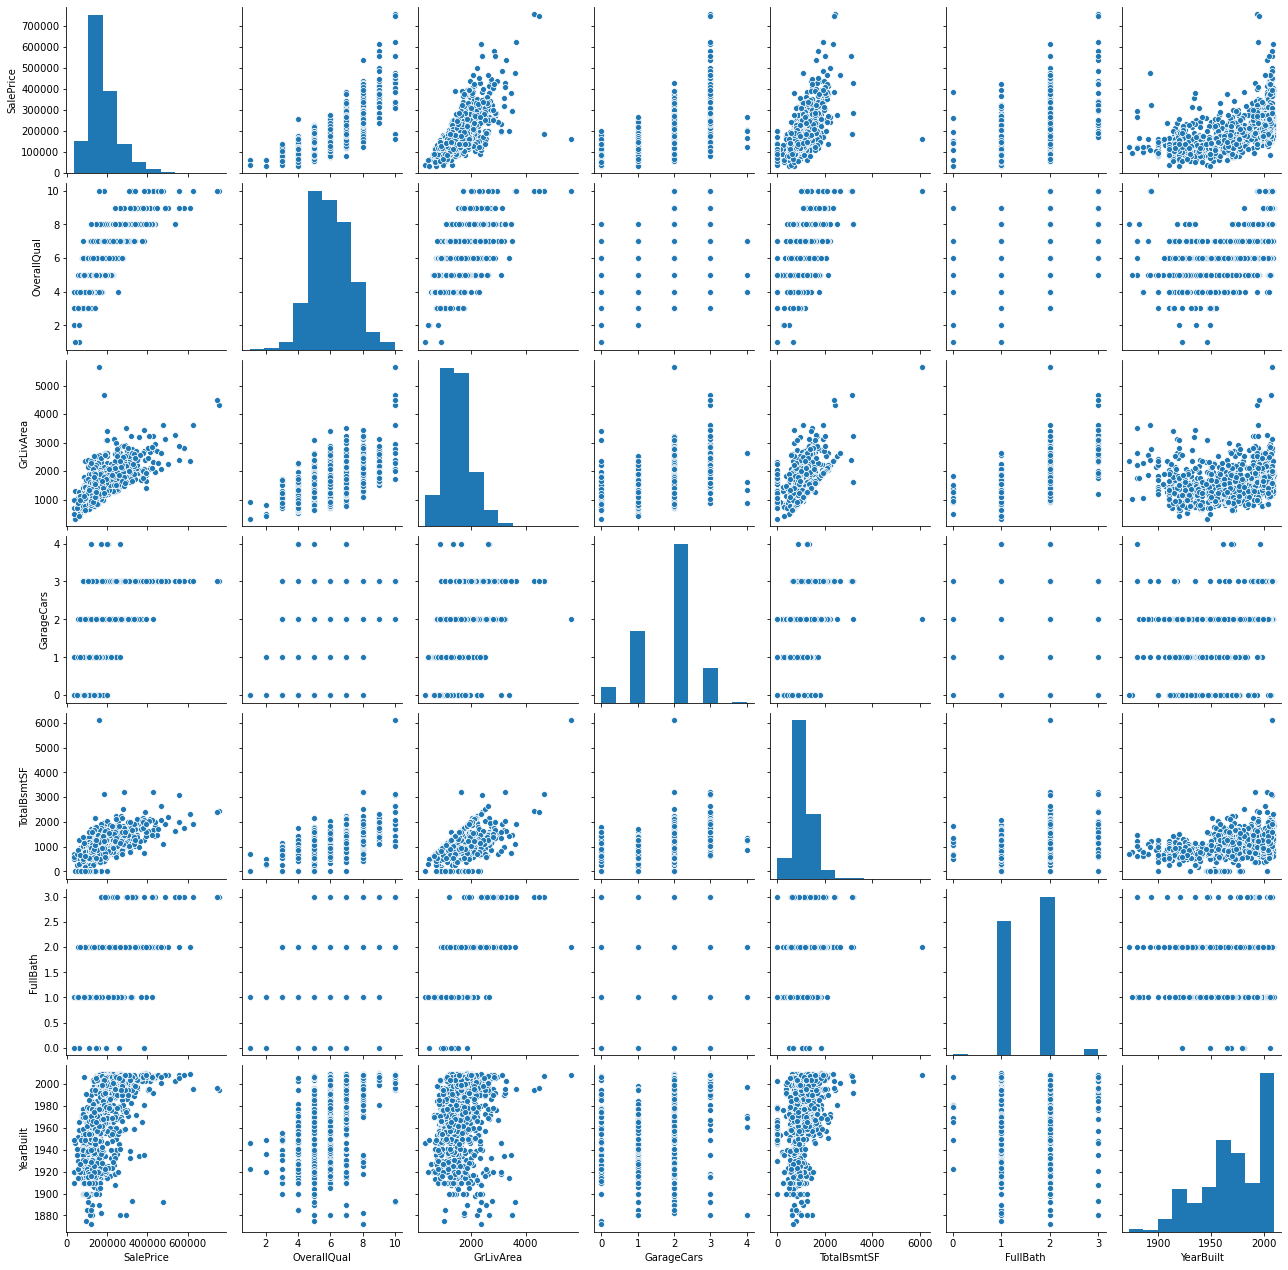

In [123]:
sns.pairplot(df_train[top_var]);

We can interprete that these top variables have a positive correlation with SalePrice
However, interesting case for GarageCars where the SalePrice drop drasticcally at GarageCars = 4
We can also see some outliers in GrLivArea, TotalBsmtSF and 1stFlrSF, as well as TotRmsAbvGrd


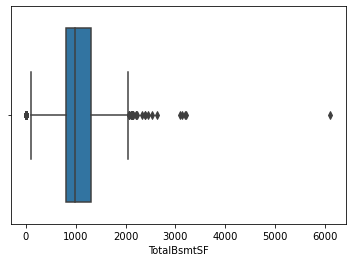

In [124]:
#to investigate outliers(starting with TotalBsmtSF):
sns.boxplot(df_train['TotalBsmtSF'].dropna())

In [125]:
#we will remove rows where TotalBsmtSF more than 5000
df_train = df_train[df_train['TotalBsmtSF']<5000]

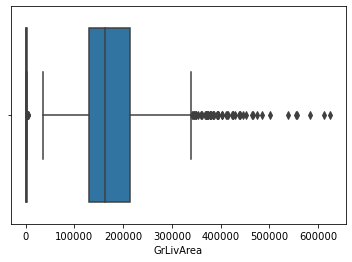

In [130]:
sns.boxplot(df_train['SalePrice'].dropna())
sns.boxplot(df_train['GrLivArea'].dropna())

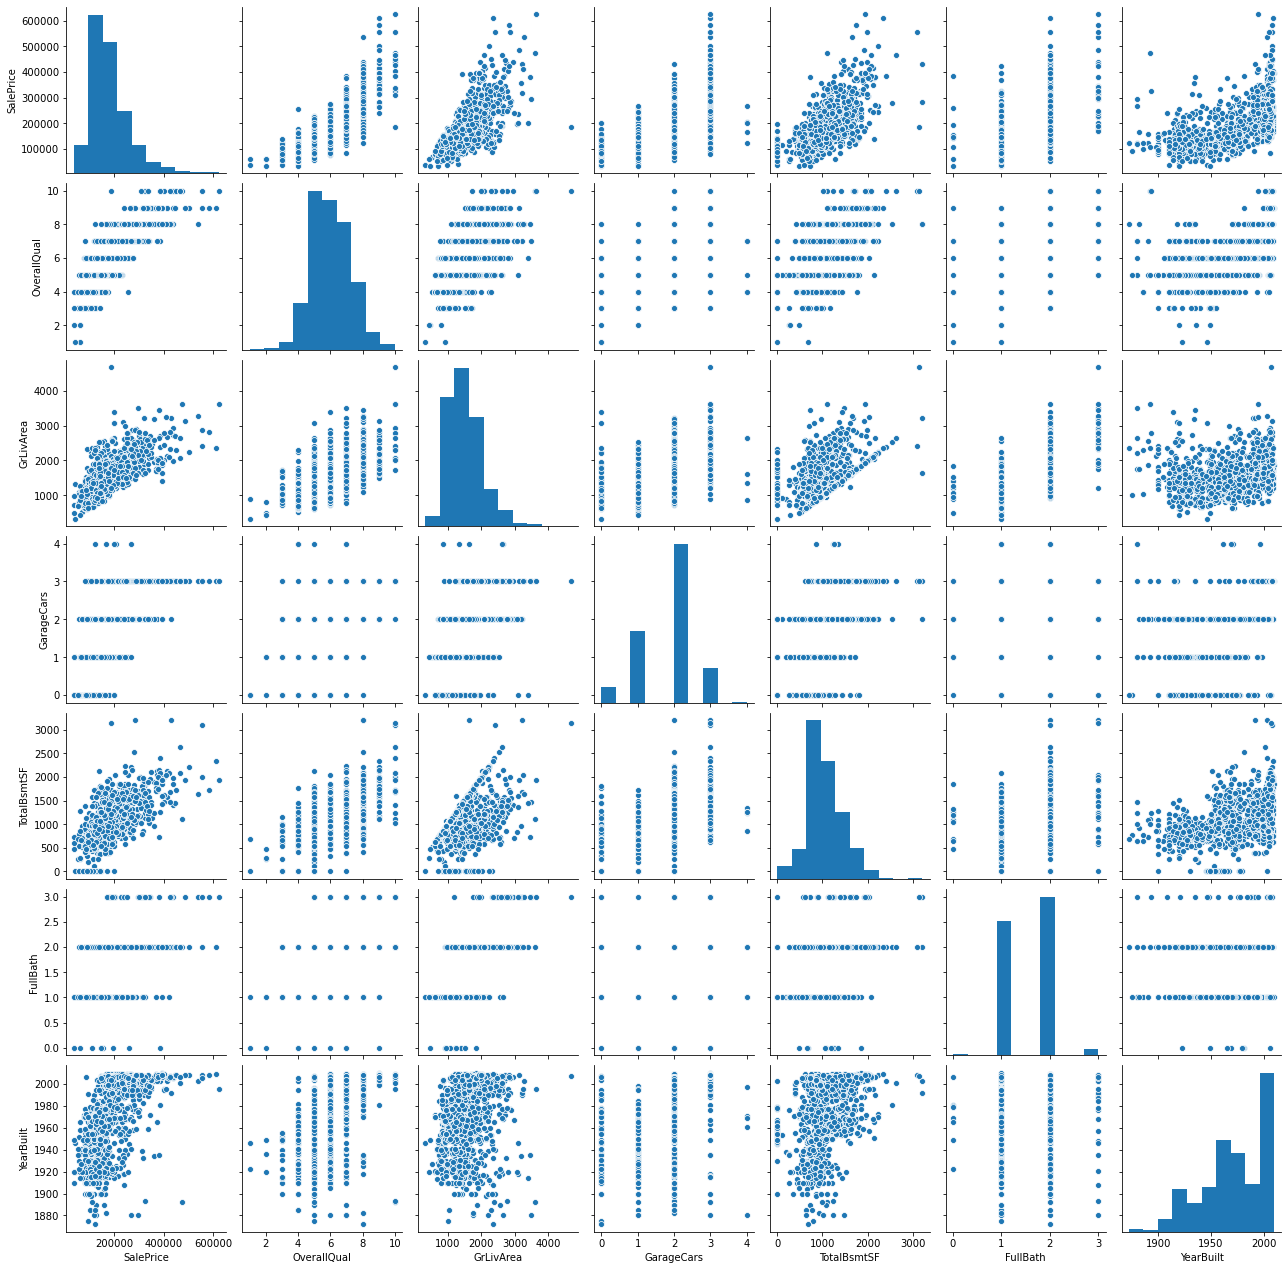

In [129]:
#lets drop high SalePrice too:
df_train = df_train[df_train['SalePrice']<700000]
sns.pairplot(df_train[top_var]);